# INS Navigation: Basics

## References

- [VectorNav Tech](https://www.vectornav.com/support/library/imu-and-ins)

In [1]:
%matplotlib inline

In [2]:
import numpy as np # matrix manipulations
from matplotlib import pyplot as plt           
import pylab                                   
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

In [4]:
import ins_nav
from ins_nav.errors import calc_errors

## Errors

Error comes from many places:

$$
error_{bias} = 0.5 * 9.81 * bias * time^2 \\
error_{missalignment} = 0.5 * 9.81 * sin(miss) * time^2 \\
error_{ARW} = 0.5 * 9.81 * sin(arw*\sqrt{time/3600}) * time^2 \\
$$

In [6]:
bias = 0.125 # [g]
miss = 0.1   # [deg]
arw  = 0.1   # [deg/sqrt(hour)]
t    = 10    # [sec]
be,me,ae = calc_errors(bias, miss, arw, t)
print("Error after {} sec".format(t))
print("---------------------------------------------------------")
print("Error from bias: {:.1f} m".format(be))
print("Error from axis misalignment: {:.1f} m".format(me))
print("Error from ARW: {:.1f} m".format(ae))

Error after 10 sec
---------------------------------------------------------
Error from bias: 61.1 m
Error from axis misalignment: 0.9 m
Error from ARW: 2.6 m


In [29]:
def run():
    bias = 0.03  # [g]
    miss = 0.1   # [deg]
    arw  = 0.1   # [deg/sqrt(hour)]
    
    sbias = []
    smiss = []
    sarw = []
    for t in range(100):
        be,me,ae = calc_errors(bias, miss, arw, t)
        sbias.append(be/1000)
        smiss.append(me/1000)
        sarw.append(ae/1000)
    plt.subplot(3,1,1); plt.plot(sbias, label="Bias"); plt.grid(True); plt.ylabel("km"); plt.legend()
    plt.subplot(3,1,2); plt.plot(smiss, label="Missalignment"); plt.grid(True); plt.ylabel("km"); plt.legend()
    plt.subplot(3,1,3); plt.plot(sarw, label="ARW"); plt.grid(True); plt.ylabel("km"); plt.legend()

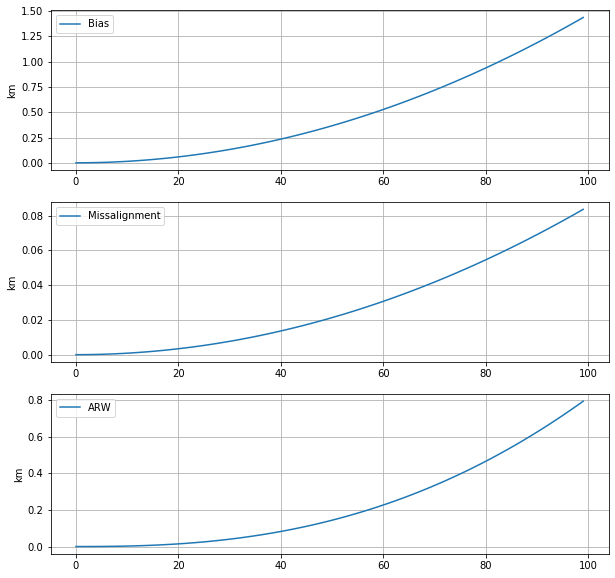

In [30]:
run()